# Traffics Signs Classification Based on Image with CNN #

* Convolutional Neural Network LeNet will be used as a classifier for traffics signs based on their images.Data has 43 types of traffic signs (32x32)

In [22]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other Stuff:
import random
import os
import PIL
import pickle
import zipfile

## Data Load ##

In [3]:
'''
zip_object = zipfile.ZipFile('traffic-signs-data.zip', mode='r')
zip_object.extractall('./')
zip_object.close()
'''

In [6]:
with open('traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open('traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [7]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [8]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [9]:
print('X_Train', X_train.shape)
print('X_test', X_test.shape)
print('X_validation', X_validation.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_validation', y_validation.shape)

X_Train (34799, 32, 32, 3)
X_test (12630, 32, 32, 3)
X_validation (4410, 32, 32, 3)
y_train (34799,)
y_test (12630,)
y_validation (4410,)


## Data Visualization ##

1

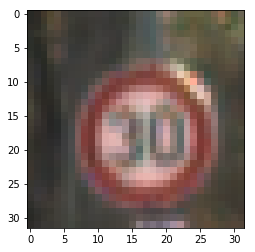

In [10]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

## Data Processing ##

In [13]:
# Shuffle data:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
# Transform image from RGB to gray ( from 3 channels to 1 channel using mean of channel intensity sum/3)
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [15]:
# Now checking gray image (only 1 channel):
print('X_train_gray', X_train_gray.shape)
print('X_test_gray', X_test_gray.shape)
print('X_validation_gray', X_validation_gray.shape)

X_train_gray (34799, 32, 32, 1)
X_test_gray (12630, 32, 32, 1)
X_validation_gray (4410, 32, 32, 1)


In [16]:
# Normalization (could be /255) (deviation)
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [17]:
print(np.max(X_train_gray_norm))
print(np.min(X_train_gray_norm))

0.9921875
-0.9713541666666666


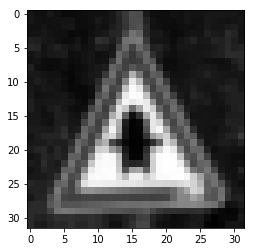

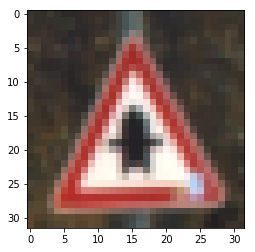

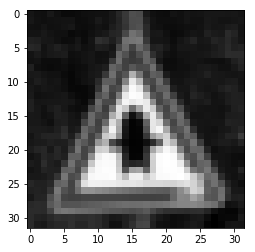

In [18]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

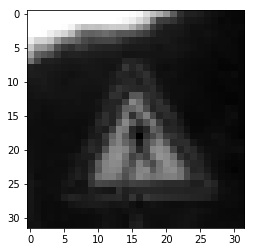

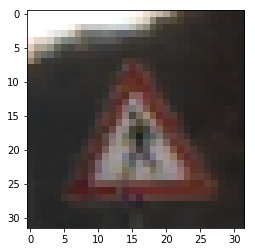

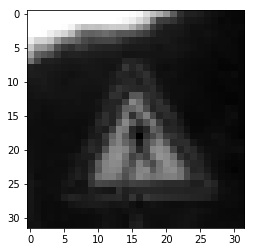

In [19]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

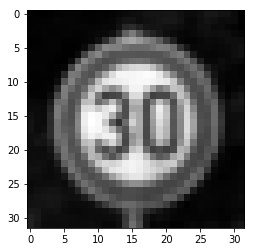

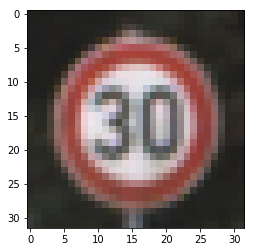

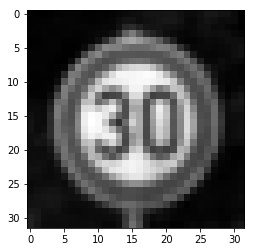

In [20]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

## Tensorflow - Neural Network Setup ##

### LeNet Architecture ###

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
# Tensor Flow:
import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
# Network Setup

LeNet = models.Sequential()

# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [24]:
epochs = 50
batch_size = 500

LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 19s 551us/sample - loss: 3.1821 - accuracy: 0.1689 - val_loss: 2.7115 - val_accuracy: 0.2739
Epoch 2/50
34799/34799 [==============================] - 14s 401us/sample - loss: 1.7153 - accuracy: 0.5240 - val_loss: 1.4658 - val_accuracy: 0.5642
Epoch 3/50
34799/34799 [==============================] - 14s 407us/sample - loss: 0.9847 - accuracy: 0.7199 - val_loss: 1.1201 - val_accuracy: 0.6429
Epoch 4/50
34799/34799 [==============================] - 14s 411us/sample - loss: 0.7172 - accuracy: 0.8006 - val_loss: 0.9174 - val_accuracy: 0.7308
Epoch 5/50
34799/34799 [==============================] - 14s 404us/sample - loss: 0.5782 - accuracy: 0.8388 - val_loss: 0.8087 - val_accuracy: 0.7617
Epoch 6/50
34799/34799 [==============================] - 13s 386us/sample - loss: 0.4843 - accuracy: 0.8680 - val_loss: 0.7531 - val_accuracy: 0.7862
Epoch 7/50
34799/34799 [=====================

## Model Error Metrics and Results ##

In [25]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 235us/sample - loss: 1.3027 - accuracy: 0.8517
Test Accuracy: 0.8517022728919983


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

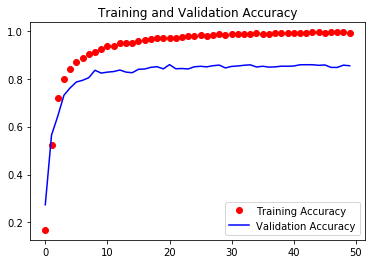

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

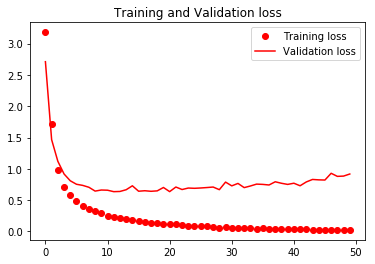

In [29]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [30]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

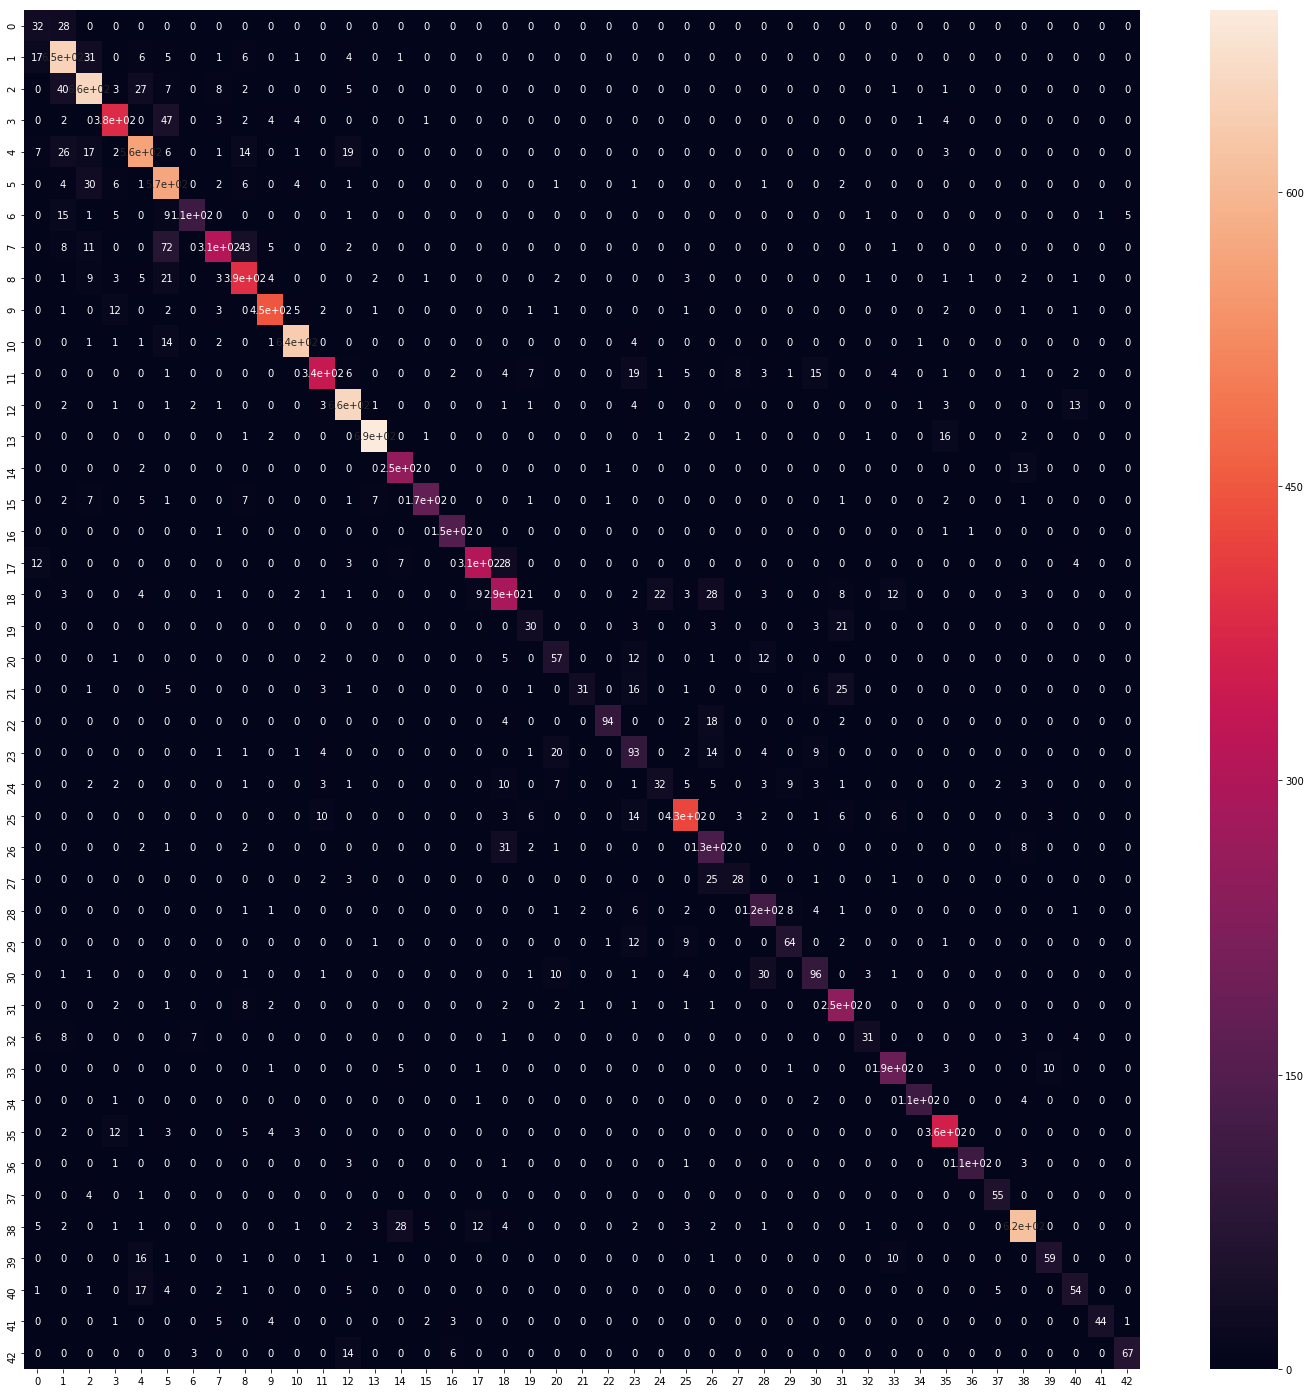

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

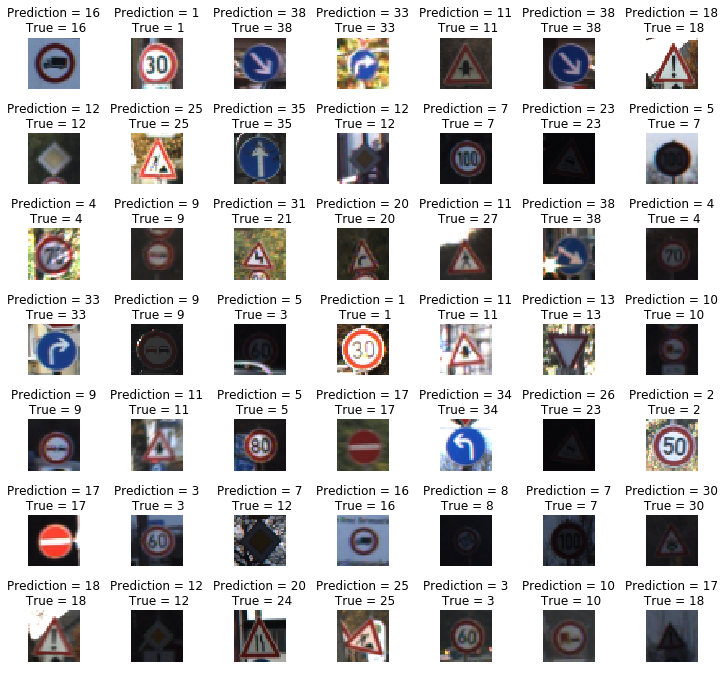

In [32]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   